# Notebook Template

This Notebook is stubbed out with some project paths, loading of enviroment variables, and common package imports to speed up the process of starting a new project.

It is highly recommended you copy and rename this notebook following the naming convention outlined in the readme of naming notebooks with a double number such as `01_first_thing`, and `02_next_thing`. This way the order of notebooks is apparent, and each notebook does not need to be needlesssly long, complex, and difficult to follow.

In [1]:
import importlib
import os
from pathlib import Path
import sys

from arcgis.features import GeoAccessor, GeoSeriesAccessor
from arcgis.gis import GIS
from dotenv import load_dotenv, find_dotenv
import pandas as pd

# import arcpy if available
if importlib.util.find_spec("arcpy") is not None:
    import arcpy
    
# load environment variables from .env
load_dotenv(find_dotenv())

True

In [2]:
# create a GIS object instance; if you did not enter any information here, it defaults to anonymous access to ArcGIS Online
gis = GIS(
    url=os.getenv('ESRI_GIS_URL'), 
    username=os.getenv('ESRI_GIS_USERNAME'),
    password=os.getenv('ESRI_GIS_PASSWORD')
)

# paths to common data locations - NOTE: to convert any path to a raw string, simply use str(path_instance)
project_parent = Path('./').absolute().parent

data_dir = project_parent/'data'

data_raw = data_dir/'raw'
data_ext = data_dir/'external'
data_int = data_dir/'interim'
data_out = data_dir/'processed'

gdb_raw = data_raw/'raw.gdb'
gdb_int = data_int/'interim.gdb'
gdb_out = data_out/'processed.gdb'

# import the project package from the project package path
sys.path.append(str(project_parent/'src'))
import netx_hydro

# load the "autoreload" extension so that code can change, & always reload modules so that as you change code in src, it gets loaded
%load_ext autoreload
%autoreload 2

In [87]:
import networkx as nx
from osgeo import ogr
import json

In [4]:
flowline_pth = data_raw/'nhd_flowline.shp'
flowline_pth.exists()

True

In [5]:
net = nx.DiGraph()
net

In [6]:
shp = ogr.Open(str(flowline_pth))
shp

<osgeo.ogr.DataSource; proxy of <Swig Object of type 'OGRDataSourceShadow *' at 0x00000256D8156E10> >

In [7]:
lyr = shp[0]

In [8]:
fields = [fld.GetName() for fld in lyr.schema]
print(fields)

['Permanent_', 'FDate', 'Resolution', 'GNIS_ID', 'GNIS_Name', 'LengthKM', 'ReachCode', 'FlowDir', 'WBArea_Per', 'FType', 'FCode', 'MainPath', 'InNetwork', 'Visibility', 'Shape_Leng', 'NHDPlusID', 'VPUID', 'Enabled']


In [65]:
f = lyr[0]
f

<osgeo.ogr.Feature; proxy of <Swig Object of type 'OGRFeatureShadow *' at 0x00000256E6BC8BD0> >

In [66]:
flddata = [f.GetField(f.GetFieldIndex(x)) for x in fields]
print(flddata)

['163811014', '2012/02/22', 2, None, None, 0.71, '17080005034043', 1, None, 460, 46003, 0, 1, 0, 0.00852547050701, 55000300304600.0, '1708', 1]


In [67]:
attributes = dict(zip(fields, flddata))
attributes

{'Permanent_': '163811014',
 'FDate': '2012/02/22',
 'Resolution': 2,
 'GNIS_ID': None,
 'GNIS_Name': None,
 'LengthKM': 0.71,
 'ReachCode': '17080005034043',
 'FlowDir': 1,
 'WBArea_Per': None,
 'FType': 460,
 'FCode': 46003,
 'MainPath': 0,
 'InNetwork': 1,
 'Visibility': 0,
 'Shape_Leng': 0.00852547050701,
 'NHDPlusID': 55000300304600.0,
 'VPUID': '1708',
 'Enabled': 1}

In [76]:
attributes['ShpName'] = lyr.GetName()
attributes

{'Permanent_': '163811014',
 'FDate': '2012/02/22',
 'Resolution': 2,
 'GNIS_ID': None,
 'GNIS_Name': None,
 'LengthKM': 0.71,
 'ReachCode': '17080005034043',
 'FlowDir': 1,
 'WBArea_Per': None,
 'FType': 460,
 'FCode': 46003,
 'MainPath': 0,
 'InNetwork': 1,
 'Visibility': 0,
 'Shape_Leng': 0.00852547050701,
 'NHDPlusID': 55000300304600.0,
 'VPUID': '1708',
 'Enabled': 1,
 'ShpName': 'nhd_flowline'}

In [77]:
g = f.geometry()
g

<osgeo.ogr.Geometry; proxy of <Swig Object of type 'OGRGeometryShadow *' at 0x00000256E65EEBA0> >

SyntaxError: invalid syntax (<ipython-input-79-baefe9d1c61c>, line 1)

In [20]:
nhdflowline_fc_pth = str(data_raw/'NHDPLUS_H_1708_HU4_GDB.gdb'/'Hydrography'/'NHDFlowline')
arcpy.Exists(nhdflowline_fc_pth)

True

In [60]:
field_name_lst = [fld.name for fld in arcpy.ListFields(nhdflowline_fc_pth) 
                  if fld.name != desc.shapeFieldName 
                  and fld.name != desc.OIDFieldName]

print(field_name_lst)

['Permanent_Identifier', 'FDate', 'Resolution', 'GNIS_ID', 'GNIS_Name', 'LengthKM', 'ReachCode', 'FlowDir', 'WBArea_Permanent_Identifier', 'FType', 'FCode', 'MainPath', 'InNetwork', 'VisibilityFilter', 'Shape_Length', 'NHDPlusID', 'VPUID', 'Enabled']


In [61]:
with arcpy.da.SearchCursor(nhdflowline_fc_pth, cur_fld_lst) as cur:
    for feat in cur:
        print(feat)
        break

('163811014', datetime.datetime(2012, 2, 22, 23, 31, 19), 2, None, None, 0.71, '17080005034043', 1, None, 460, 46003, 0, 1, 0, 0.008525470507011646, 55000300304572.0, '1708', 1, <Polyline object at 0x256e70560f0[0x256ed1931e8]>)


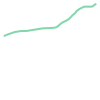

In [64]:
geom = feat[-1]
geom

In [97]:
ogr.Geometry()

TypeError: in method 'new_Geometry', argument 1 of type 'OGRwkbGeometryType'

In [32]:
geom_type = arcpy.Describe(nhdflowline_fc_pth).shapeType
if geom.type == 'point':
    net.addNode((geom.centroid.X, geom.centroid.Y), **attributes)
elif geom.type == 'polyline':
    print('polyline')
else:
    raise Exception(f'Geometry type {geom_type} is not a supported geometry for a NetX Graph.')

polyline


In [106]:
paths = json.loads(geom.JSON)['paths']
path = paths[0]

pt1 = ogr.Geometry(ogr.wkbPoint)

In [107]:
geom.type

'polyline'

In [ ]:
def edges_from_esri_paths(paths, attrs, simplify=True, geom_attrs=True):
    """
    Generate edges for each line in geom
    Written as a helper for read_fgdb_fc
    Parameters
    ----------
    paths:  paths object from Esri line geometry
        To be converted into an edge or edges
    attrs:  dict
        Attributes to be associated with all geoms
    simplify:  bool
        If True, simplify the line as in read_shp
    geom_attrs:  bool
        If True, add geom attributes to edge as in read_shp
    Returns
    -------
     edges:  generator of edges
        each edge is a tuple of form
        (node1_coord, node2_coord, attribute_dict)
        suitable for expanding into a networkx Graph add_edge call
    """
    # if not multiline
    if len(paths) == 1:
        
        # extract the path
        path = path[0]
        
        # get the edge attributes 
        edge_attrs = attrs.copy()
        
        # if simplifying the line
        if simplify:
            
            # create an ogr geometry object to work with
            segment = ogr.Geometry(ogr.wkbLineString)
            
            # add the first and last verticies to the segment
            segment.AddPoint_2D(path[0][:2])
            segment.AddPoint_2D(path[-1][:2])
            
            # if geometry attributes are being added, tack them on
            if geom_attrs:
                edge_attrs["Wkb"] = segment.ExportToWkb()
                edge_attrs["Wkt"] = segment.ExportToWkt()
                edge_attrs["Json"] = segment.ExportToJson()
                
            yield (segment.GetPoint_2D(0), segment.GetPoint_2D(1), edge_attrs)
            
        # if not simplifying
        else:
            
            # start iterating the vertex pair segments
            for i in range(len(path) - 1):
                
                # create an ogr geometry object to work with
                segment = ogr.Geometry(ogr.wkbLineString)

                # add the current and next verticies to the segment
                segment.AddPoint_2D(path[i][:2])
                segment.AddPoint_2D(path[i+1][:2])

                # if geometry attributes are being added, tack them on
                if geom_attrs:
                    edge_attrs["Wkb"] = segment.ExportToWkb()
                    edge_attrs["Wkt"] = segment.ExportToWkt()
                    edge_attrs["Json"] = segment.ExportToJson()

                yield (segment.GetPoint_2D(0), segment.GetPoint_2D(1), edge_attrs)
        
    # if multiline
    elif len(paths) > 1:
        
        # for every path in paths (representing continuous line segment)
        for i in range(len(paths)):
            
            # rip out the single ring for this iteration
            path_i = paths[i]
            
            # make it even more confusing to generate to this generator - yeah
            yeild from edges_from_esri_paths(path_i, attrs, simplify, geom_attrs)